# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings

warnings.filterwarnings("ignore")


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)



from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [3]:
visa = pd.read_csv("EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
# checking first 5 rows 
visa.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# checking bottom 5 rows 

visa.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
visa.sample(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17980,EZYV17981,Asia,Bachelor's,N,N,2632,1885,Northeast,60056.92,Year,Y,Denied
24416,EZYV24417,North America,Master's,N,N,5125,1866,West,24444.65,Week,Y,Denied
19281,EZYV19282,Asia,Bachelor's,N,Y,356,2011,West,67709.84,Year,Y,Certified
841,EZYV842,Asia,High School,N,N,8315,1994,South,105974.33,Year,Y,Certified
1049,EZYV1050,Asia,High School,Y,N,5215,2005,South,79230.67,Year,N,Certified
24105,EZYV24106,Asia,High School,Y,N,25200,2008,South,137102.99,Year,Y,Certified
5842,EZYV5843,Asia,Master's,Y,N,439,1997,Northeast,62864.96,Year,Y,Certified
16232,EZYV16233,Asia,Master's,N,N,1641,1838,Island,101267.72,Year,N,Certified
12729,EZYV12730,North America,Master's,N,N,3461,2004,Northeast,124220.84,Year,Y,Certified
24667,EZYV24668,North America,Bachelor's,Y,Y,5878,2008,West,98593.91,Year,Y,Certified


In [7]:
# shape of the data 
visa.shape
print(visa.shape)
print("There are 25480 Rows and 12 columns")

(25480, 12)
There are 25480 Rows and 12 columns


In [8]:
# checking the data types
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observation

* There are 9 Object , 2 int and 1 float data types

In [9]:
# checking for null values
print(visa.isnull().sum())

print("Observation:" "There are no missing values")

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64
Observation:There are no missing values


In [10]:
print(visa.duplicated().sum())
print("Observation:" "There are no duplicate values")

0
Observation:There are no duplicate values


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [11]:
# making a copy of the data set
df= visa.copy()

In [12]:
# statistical summary

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV2444,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation:
* case id               : All unique values and can be removed as it doesnt add any value to the Analysis.
* Continent             : 6 unique values . Asis is the top in the data.
* Education_of_employee	: 4 unique values. Bachelors is the top in the data.
* Has_job_experience	: Binary value Yes or No. Yes seems to be the top value.
* Requires_job_training	: Binary value Yes or No. No seems to be the top value.
* No_of_employees	    : Huge difference between mean and median. Possible outliers and needs to be identified and treated if needed. Some of the values show -ve values which is unusal. Possible data entry error and needs to be treated.
* yr_of_estab           : years ranging from  1800 to 2016.
* region_of_employment  : 5 Unique values. Northeast seems to be thw top value.
* prevailing_wage       : values ranging from 2.13 to 319210. Mean and median values are not closer and there could be possible outliers.
* unit_of_wage	        : 4 unique values. 
* full_time_position    : Binary value Yes or No.Yes seems to be the top value.
* case_status	        : Is the target variable and is a Binary value certified and Denied. Certified seems to be a top value.


In [13]:
# dropping the colummn case_id 
df.drop(['case_id'],axis=1,inplace=True)

 #### Fixing the Negative values in the column no_of_employees

In [14]:
df[df["no_of_employees"]<0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [15]:
df.loc[df["no_of_employees"]<0].shape

(33, 11)

In [16]:
# Total of 33 rows which have negative values. Hence, converting them into absolute values

df["no_of_employees"]= abs(df["no_of_employees"])

In [17]:
df.loc[df["no_of_employees"]<0].shape

(0, 11)

### Observation : All the negative values have been converted to absolute values 

### Let us now check for the unique values in each column

In [18]:
n = df.nunique(axis=0)

print(n)

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64


In [19]:
# let us now the count of each unique category in each of the categorical variables.
cat_list = list(df.select_dtypes("object").columns)
# Printing number of count of each unique value in each column

for column in cat_list:
    print(df[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

### Observation : Above is the Count of each unique category in each of the categorical variables across all the columns

###  Calling all functions to perform  Uni and Bi variate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Performing univariate analysis on the all the columns to understand the distribution and the percentage of the data within the column

#### Type of plots being used 
  *  histogram_boxplot
  *  labeled_barplot    

### no_of_employees

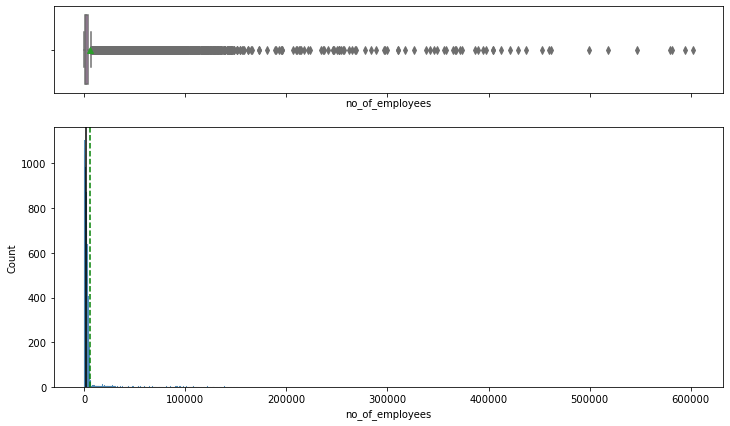

In [192]:
histogram_boxplot(df,'no_of_employees',kde=False,)

### Observation : 
* The data is highly skewed to the right

### education_of_employee

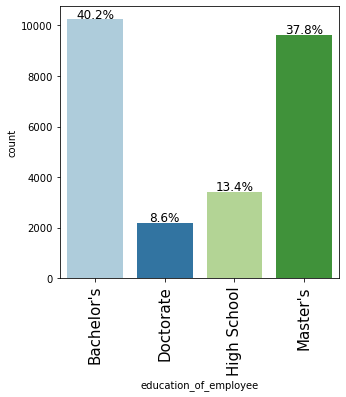

In [193]:
labeled_barplot(df,'education_of_employee',perc=True)
plt.show()

### Observation : 
* 40% of them have Bachelors Degree.
* 37.8% have Masters Degeree
* only 8.6% have a Doctorate

### continent

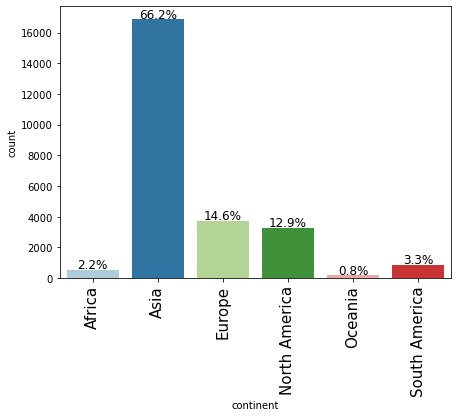

In [194]:
labeled_barplot(df,'continent',perc=True)
plt.show()

### Observation : 
* Most the applications are from Asia with a huge margin of 66%.
* Oceania has the least applicants.

### has_job_experience

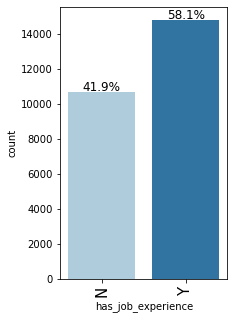

In [196]:
labeled_barplot(df,'has_job_experience',perc=True)
plt.show()

### Observation : 
* Almost 40% of the applicants have no job experience.
* 58% of the applicants have job experience.

### requires_job_training

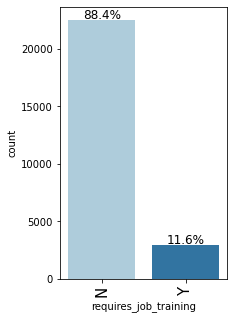

In [197]:
labeled_barplot(df,'requires_job_training',perc=True)
plt.show()

### Observation : 
* Almost 88.4% do not require job training.

### yr_of_estab

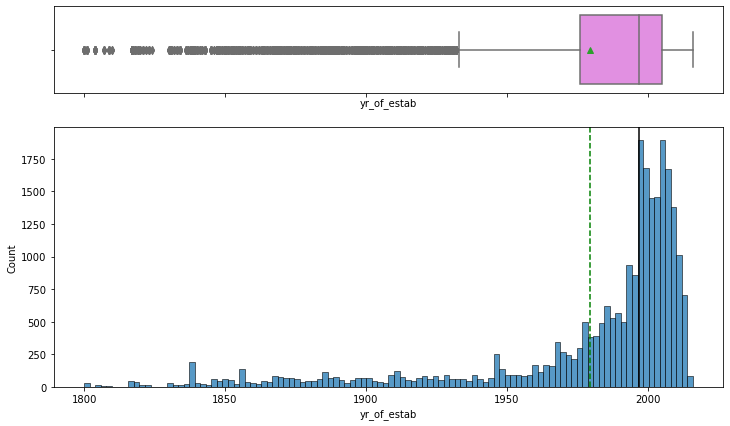

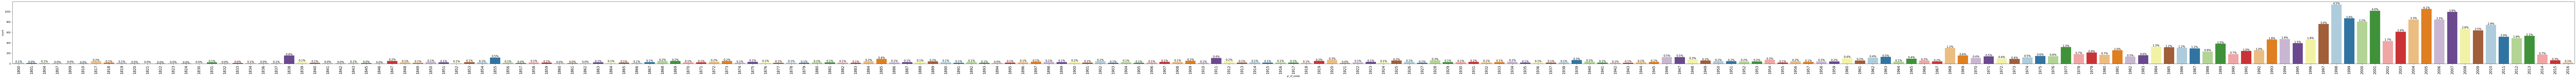

In [199]:
histogram_boxplot(df,'yr_of_estab',kde=False,)
labeled_barplot(df,'yr_of_estab',perc=True)
plt.show()

### Observation : 
* Year of est ranges from 1800 to 2016.
* Year 1998 has the highest establishments by 4.5%

### region_of_employment

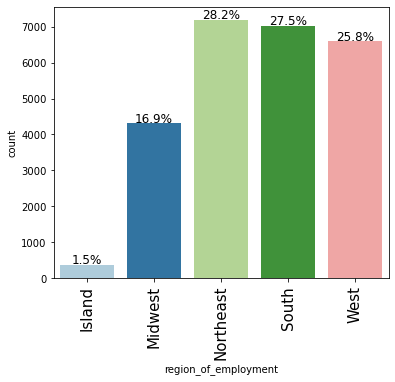

In [200]:
labeled_barplot(df,'region_of_employment',perc=True)
plt.show()

### Observation:
* Northeast is  the highest region of employment with 28%. followed by south with 27.5% and west with 25.8%.
* Island region is the least with  only 1.5%.

### prevailing_wage

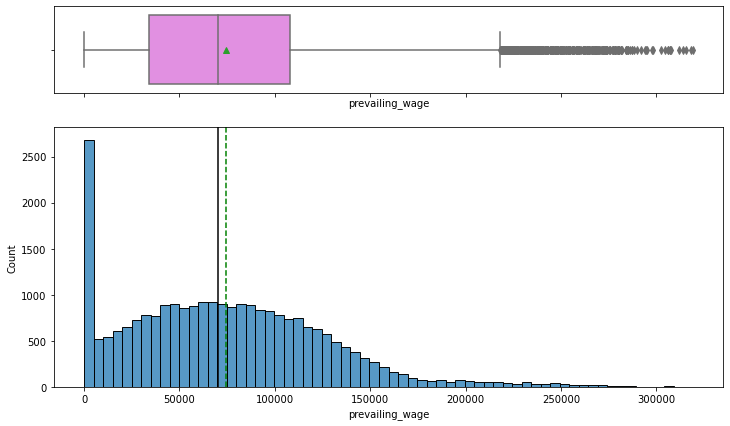

In [201]:
histogram_boxplot(df,'prevailing_wage',kde=False,)
plt.show()

### Observation: 
* The Data is highly skewed to the right.
* There are prevailing wage with the value 0 and needs to be looked at.
* There are jobs which offer a wage greater than 300000.

### unit_of_wage

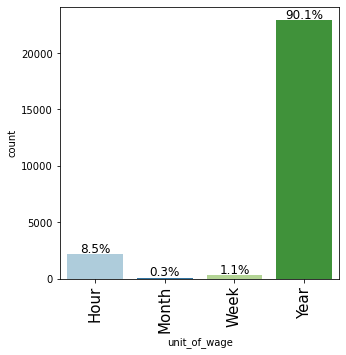

In [202]:
labeled_barplot(df,'unit_of_wage',perc=True)
plt.show()

### Observation : 
* Majority of the unit wage is yearly by 90.1% followed by hour wage by 8.5%.

### full_time_position

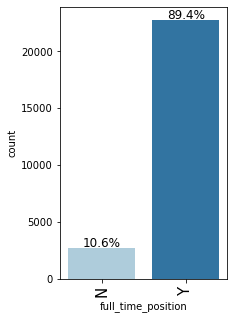

In [203]:
labeled_barplot(df,'full_time_position',perc=True)
plt.show()

### Observation : 
* 89.4% is for full time postions

### case_status

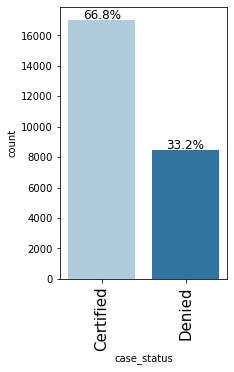

In [204]:
labeled_barplot(df,'case_status',perc=True)
plt.show()

### Observation: 
* 66.8% of the applications are certified.

### Bi variate Analysis
#### Conducting bi variate analysis against the target varible with all the independent variables individually to understand how it effects the target variable indivdually.
#### Type of plots 
* distribution_plot_wrt_target
* stacked_barplot

### continent vs case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


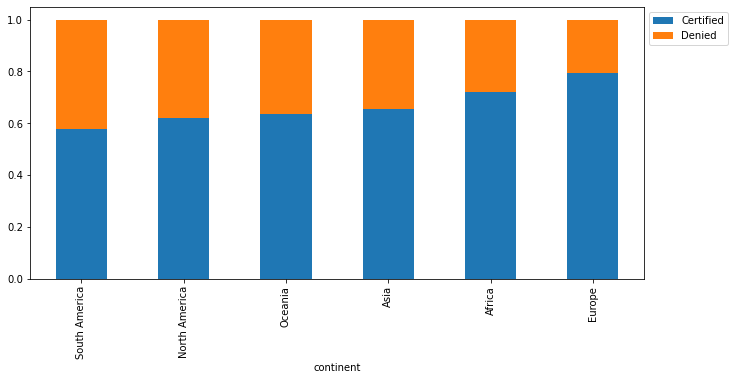

In [206]:
stacked_barplot(df,'continent','case_status')

plt.show()

### Observation: 
* Europe has the highest number of certified visas followed by Africa.
* Asia has the highest number of application and stands third when it comes to the number of visas getting certified.
* South America for some reason has the lowest percentage of visas getting certified.

### education_of_employee vs case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


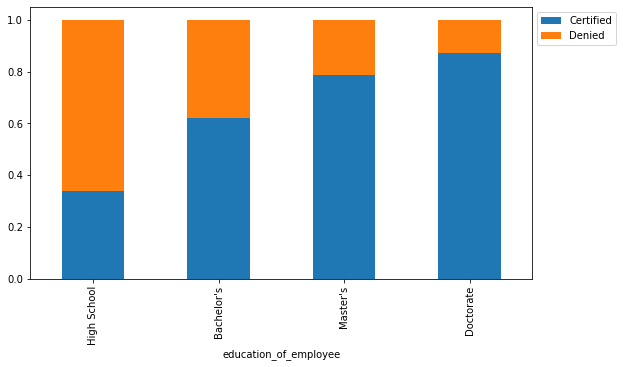

In [25]:
stacked_barplot(df,'education_of_employee','case_status')
plt.show()

### Observation: 
* Applicant who have a Doctorate has higher chances of being certified followed by Masters.
* Applicants with High school Education has the highest chances of visa being denied.

### has_job_experience vs case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


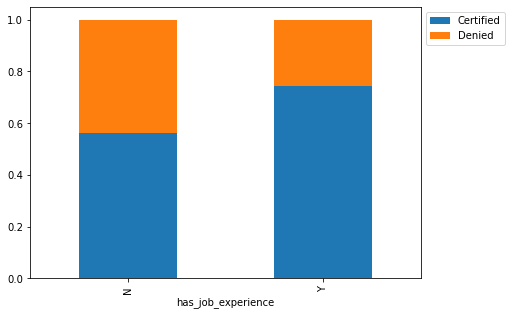

In [26]:
stacked_barplot(df,'has_job_experience','case_status')
plt.show()

### Observation: 
* Chances of visa being certified is high when the applicant has any previous job experience.

### requires_job_training vs case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


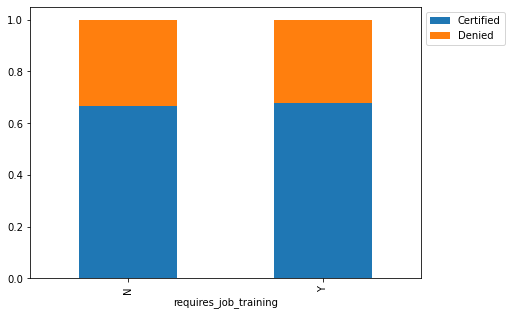

In [27]:
stacked_barplot(df,'requires_job_training','case_status')
plt.show()

### Observation:
* Job training isnt a factor that really matters for visa getting certified.

### yr_of_estab vs case_status

case_status  Certified  Denied    All
yr_of_estab                          
All              17018    8462  25480
1998               736     398   1134
2001               656     361   1017
2005               719     332   1051
2007               682     312    994
...                ...     ...    ...
1822                 3       1      4
1820                 5       1      6
1842                 5       1      6
1810                 3       0      3
1846                 4       0      4

[200 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


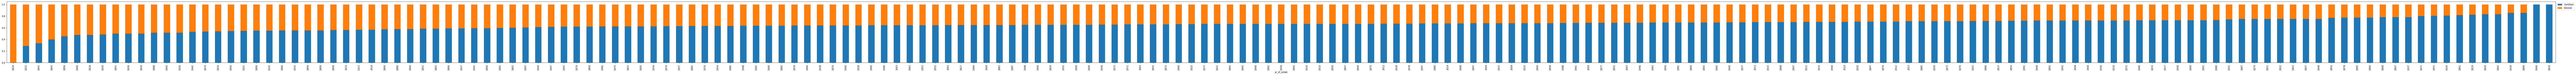

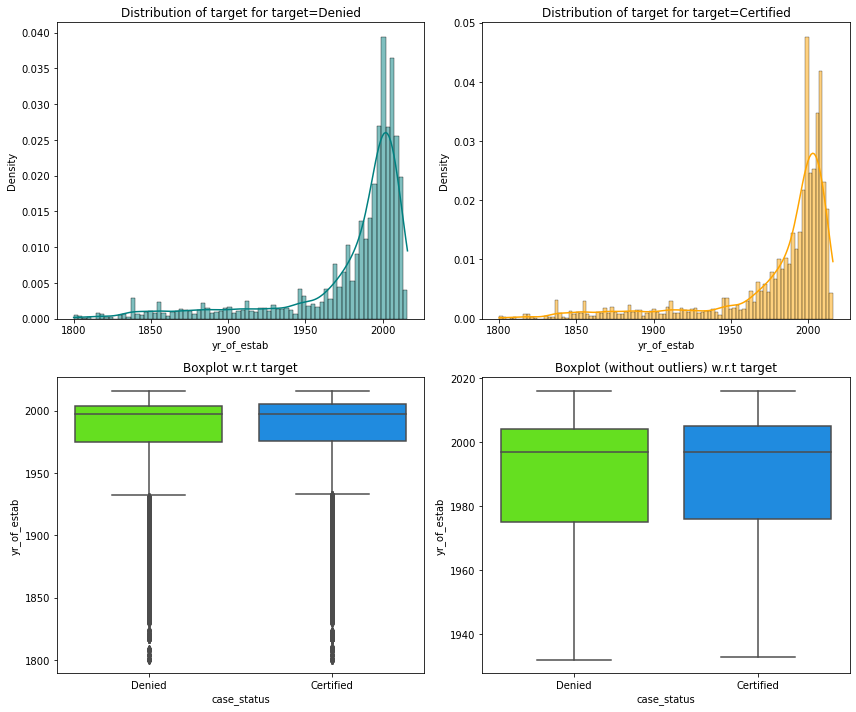

In [29]:
stacked_barplot(df,'yr_of_estab','case_status')
distribution_plot_wrt_target(df,'yr_of_estab','case_status')

### Observation: 
* Year of establishment has no significant importance against case status.

### region_of_employment vs case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


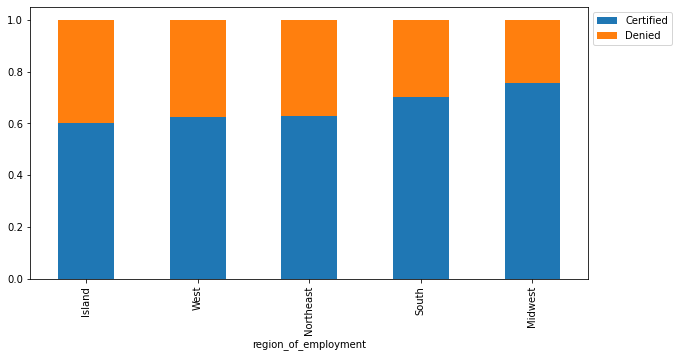

In [30]:
stacked_barplot(df,'region_of_employment','case_status')
plt.show()

### Observation: 
* Midwest Region followed by south and northeast has higher cases certified.
* Island has the least cases that are certified.

### prevailing_wage vs case_status

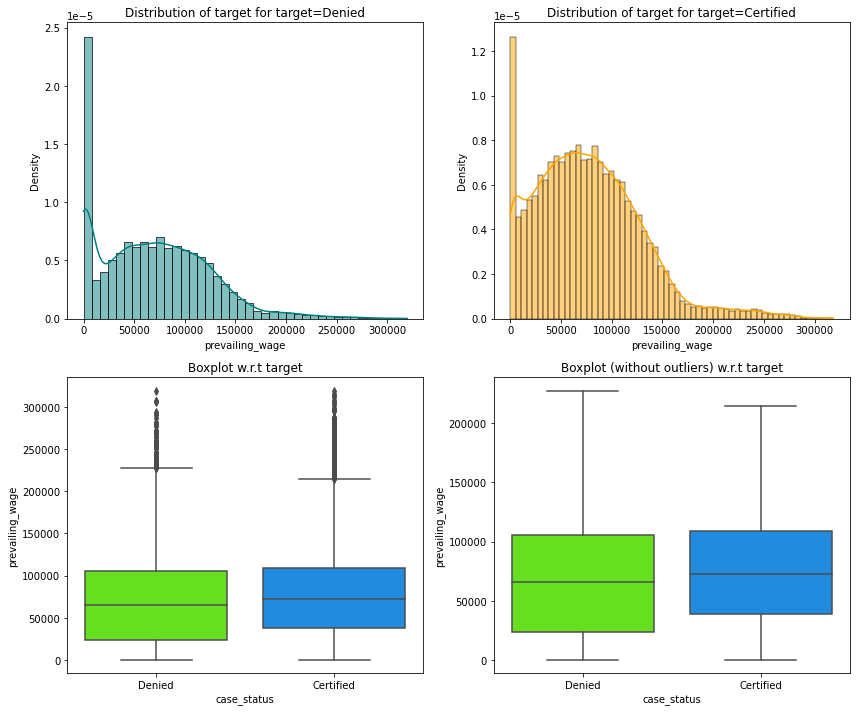

In [31]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

### Observation: 
* The peak prevailing wage for both denied and certified cases i between 50k to 100k.
* However, the certified cases show avery high peak when compared to thr denied cases.
* The meadian for the certified cases is higher than the denied cases.

### unit_of_wage vs case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


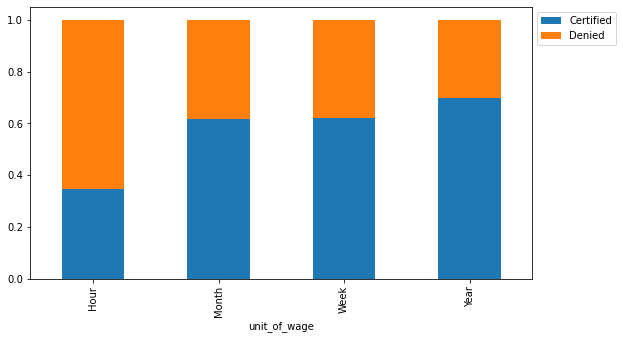

In [32]:
stacked_barplot(df,'unit_of_wage','case_status',)

### Observation: 
* Yearly unit wage has higher chances of certified cases followed by week unit wage.
* Hour unit has the lowest chances.

### full_time_position vs case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


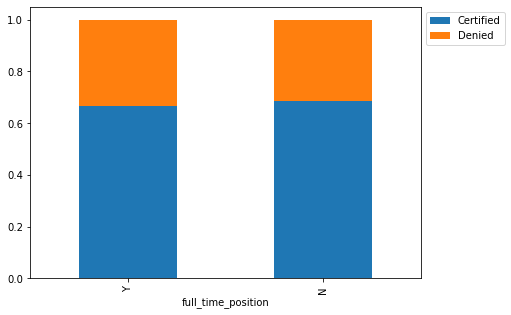

In [33]:
stacked_barplot(df,'full_time_position','case_status')

### Observation: 
* As, shown above both full time and non full time has almost the same chances of getting certified as well as denied.
* Full time position doesnt really stand out in giving us  inputs on the visas being certified.

**Leading Questions**:



### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


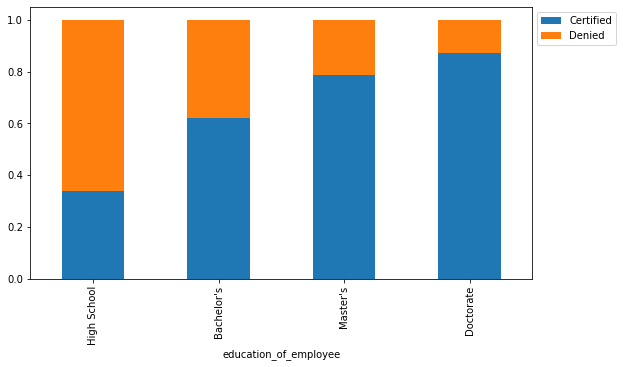

In [34]:
stacked_barplot(df,'education_of_employee','case_status')

#### Observation :
* As,observed in the plot above higher the Education higher the chances of getting certified.

### 2. How does the visa status vary across different continents? 
 


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


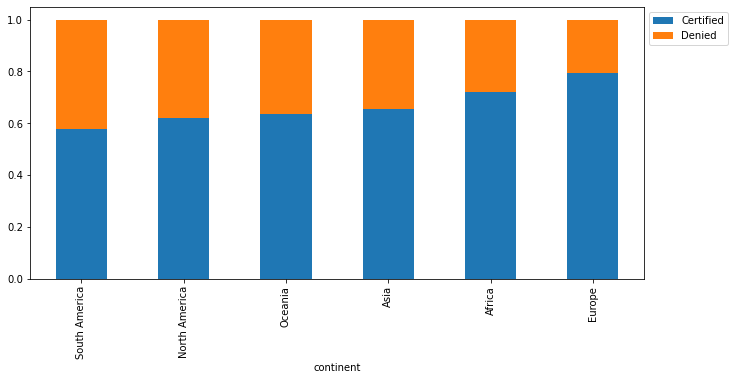

In [35]:
stacked_barplot(df, 'continent','case_status')

### Observation:
* Asia is a continent with highest number of overall Visa applications.
* Europe has the highest number of certified visas followed by Africa.
* South America has lowest number of certified visas.

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


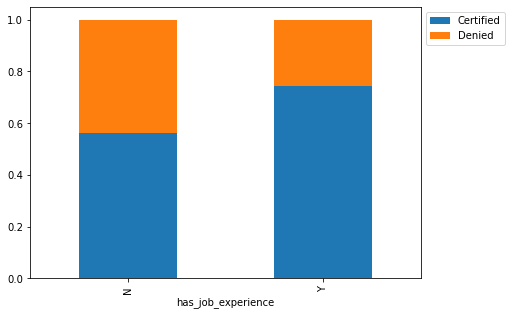

In [36]:
stacked_barplot(df,'has_job_experience','case_status')

### Observation:

* Yes, Eperienced professionals have more preference or oppurtunity of Visas being certified.

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


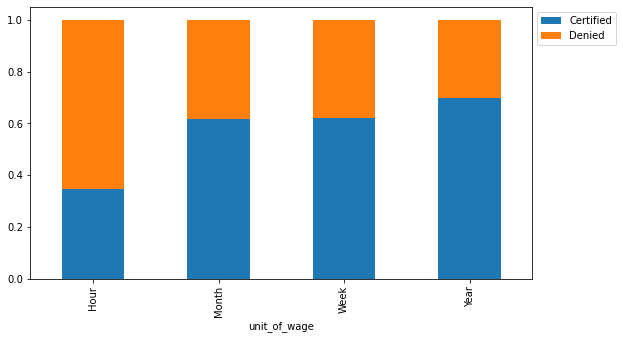

In [37]:
stacked_barplot(df,'unit_of_wage','case_status')

### Observation: 
* As, observed in the plot the unit of wage 'year'  has more preference to be certified for a visa.

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

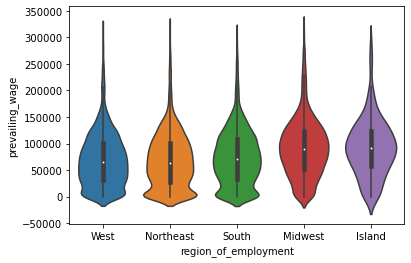

In [243]:
#  Lets first check the prevailing wage across regions  with box plot 
sns.violinplot(df['region_of_employment'],df['prevailing_wage'], )
plt.show()

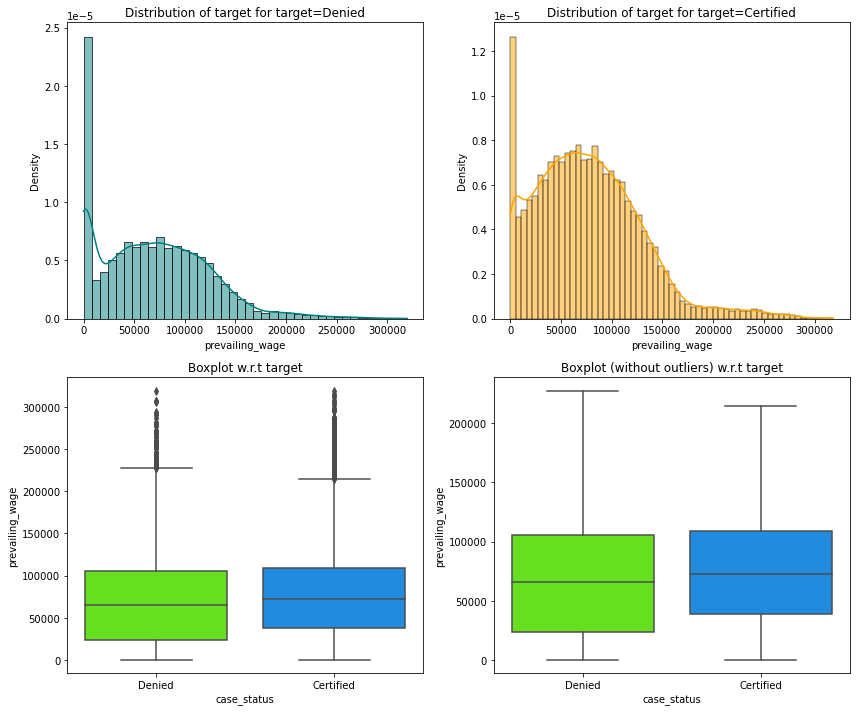

In [39]:
# Lets us now check the if prevailing wages has any effect on visa status
distribution_plot_wrt_target(df,'prevailing_wage','case_status')


### Observation: 

* Mid west and Island regions have higher prevailing wages comapred to the other regions.
* The median and peak  of the certified cases is slightly higher than the denied cases.

### Multi variate Analysis to check the distribution and correlation between the variables
#### Type of plots
* histplot
* Heat map
* pairplot


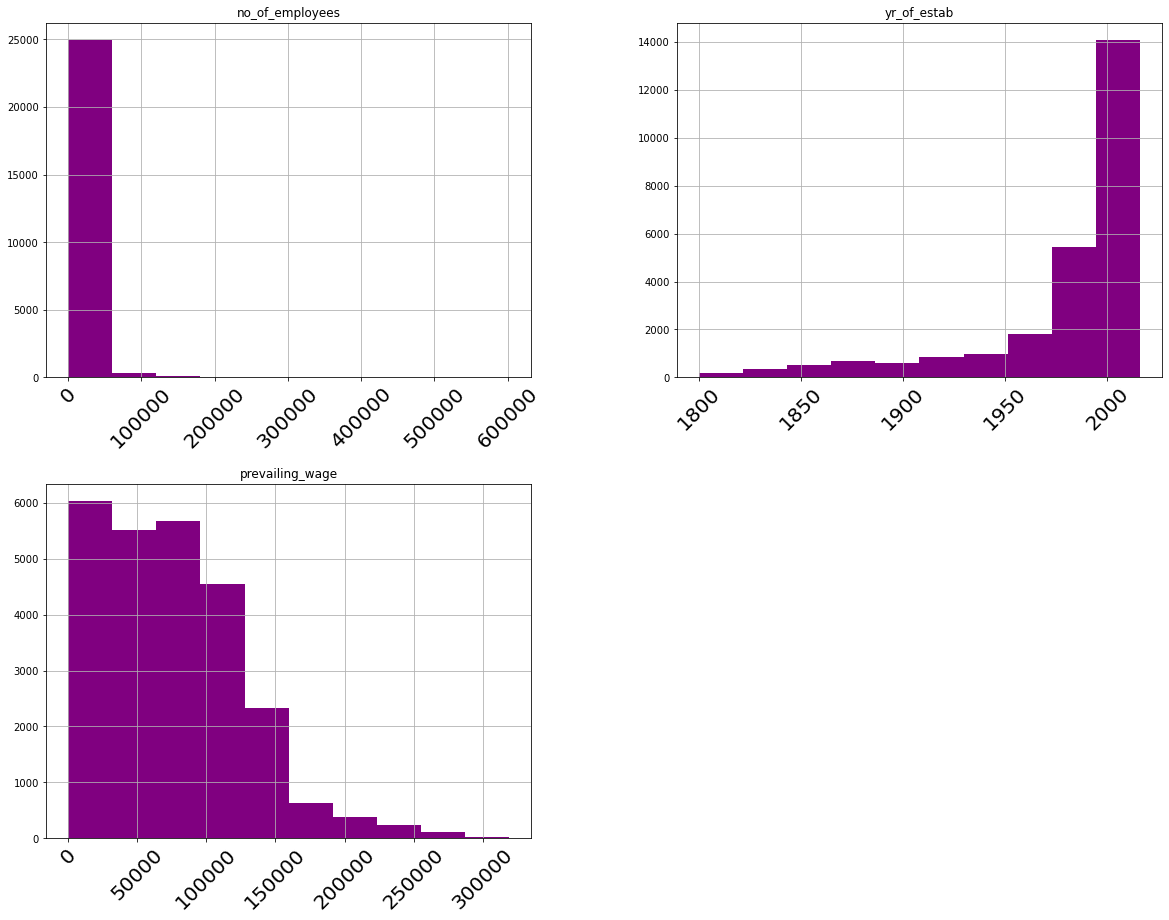

In [40]:
df.hist(figsize=(20,15),bins=10,color="purple",xlabelsize=20, ylabelsize=10,xrot=45 )
plt.show()

### Observation: 

* Data is defintley skewed to the right and needs to be looked at in the further steps.

### pairplot

<Figure size 1080x720 with 0 Axes>

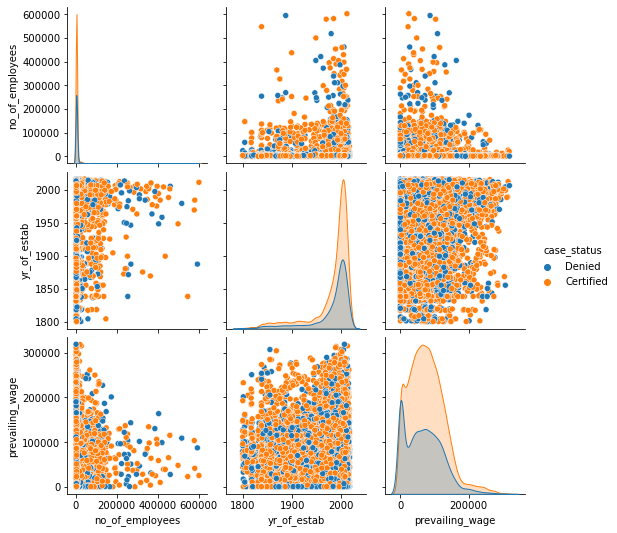

In [41]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue = "case_status")
plt.show()

### Observation:
* As, it is observed there is no particular pattern or correlation amongst the numerical variables.

### Heatmap 

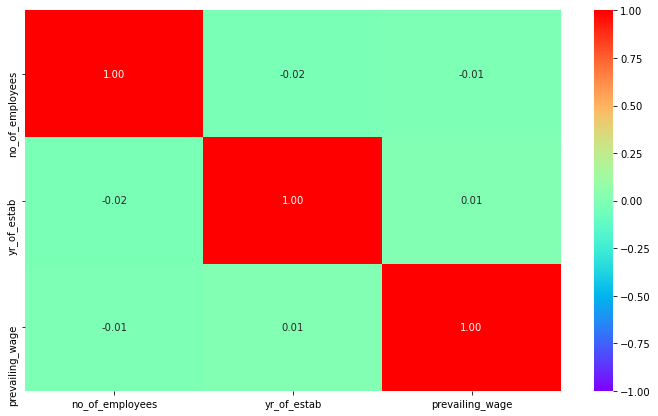

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(
        df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="rainbow"
)
plt.show()

### Observation : 
* There is no correlation between the numerical  variables

# Summary of the EDA

#### Data Description:
* There are 25480 Rows and 12 columns
* There are 9 Object , 2 int and 1 float data types
* There are no duplicate values
* There are no missing values
    *has 
#### Observations from EDA:
* case id               : All unique values and can be removed as it doesnt add any value to the Analysis.
* Continent             : 6 unique values . Asia is the top in the data.Most the applications are from Asia with a huge margin of 66%.Oceania has the least applicants.Europe has the highest number of certified visas followed by Africa.South America for some reason has the lowest percentage of visas getting certified.
* Education_of_employee	: 4 unique values. Bachelors is the top in the data. 40% of them have Bachelors Degree. 37.8% have Masters Degeree.8.6% have a Doctorate.Applicant who have a Doctorate has higher chances of being certified followed by Masters.Applicants with High school Education has the highest chances of visa being denied.
* Has_job_experience	: Binary value Yes or No. Yes seems to be the top value.58% of the applicants have job experience.Chances of visa being certified is high when the applicant has any previous job experience.
* Requires_job_training	: Binary value Yes or No. No seems to be the top value.Almost 88.4% do not require job training.
* No_of_employees	    : Huge difference between mean and median. Possible outliers and needs to be identified and treated if needed. Some of the values show -ve values which is unusal. Possible data entry error and needs to be treated.
* yr_of_estab           : years ranging from  1800 to 2016.
* region_of_employment  : 5 Unique values. Northeast seems to be thw top value.Northeast is the highest region of employment with 28%.Island region is the least with only 1.5%.Midwest Region followed by south and northeast has higher cases certified.Island has the least cases that are certified.
* prevailing_wage       : values ranging from 2.13 to 319210. Mean and median values are not closer and there could be possible outliers.The median for the certified cases is higher than the denied cases.
* unit_of_wage	        : 4 unique values.Majority of the unit wage is yearly by 90.1%.Yearly unit wage has higher chances of certified cases. Hour unit has the lowest chances. 
* full_time_position    : Binary value Yes or No.Yes seems to be the top value.
* case_status	        : Is the target variable and is a Binary value certified and Denied. Certified seems to be a top value.

#### Data that requires Preprocessing:
* No missing values
* No duplicate values
* Applying one hot encoding on target variable
* encode categorical features
* Check for Outliers 
* Preparing data for modeling

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [43]:
# making a copy of the data frame
df2 = df.copy()

In [44]:
# Converting the target varible into binary values 0 and 1 
df2['case_status']= df2['case_status'].apply(lambda x:1 if x=='Certified' else 0)

In [45]:
# The values have now been coveeted to 1 or 0
df2['case_status'].sample(5).reset_index()

,index,case_status
0,10795,1
1,4189,0
2,16966,1
3,5628,1
4,14324,1


## Outlier Detection

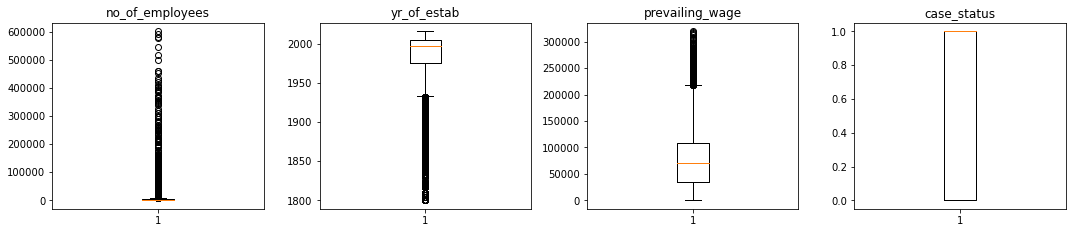

In [46]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation : 
 * There are Outliers Observed. However, as we are considering a Decision tree model.The Decision Tree isnt senstive or is affected by the outliers. Hence, we are not treating the outliers. 

### EDA Post Data Preprocessing
* There wasnt any pre processing conducted and hence the EDA reamins the same.

### Data Prep for Modelling

#### Encode Dummy variables

In [47]:
# Creating Training and data sets
X= df2.drop(['case_status'], axis=1)
y= df2['case_status']

# creating dummy variables for all the categoricals columns

X= pd.get_dummies(X,drop_first=True)

In [48]:
# splitting the data into train and test set in 70:30 Ratio
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3, random_state=1, stratify=y)

In [49]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


# Model evaluation criterion
#### Model can make wrong predictions as:
Model predicts that the visa application will get certified but in reality, the visa application should get denied.
Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

#### Which case is more important?
#### Both the cases are important as:

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

#### How to reduce the losses?
F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use balanced class weights so that model focuses equally on both classes.
#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [59]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

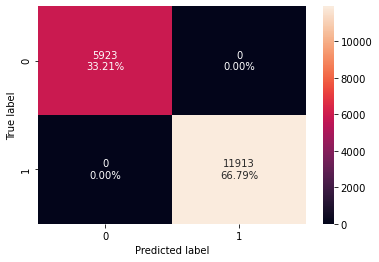

In [61]:
# confusion matrix for train data
confusion_matrix_sklearn(dtree, X_train, y_train)

In [107]:
## Let's check the performance on train data
decision_tree_perf_train = model_performance_classification_sklearn(dtree, X_train, y_train) 
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Observation:
* As, expected the decision tree grew upto it max limit clasiifying each data point.
* The model fits perefectly well on training data without any errors.

### Checking model performance on test set

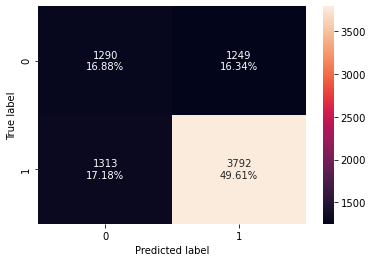

In [65]:
## Let's create confusion matrix for test data
confusion_matrix_sklearn(dtree,X_test,y_test)

In [250]:
# lets check for model performance 
decision_tree_perf_test = model_performance_classification_sklearn(dtree, X_test, y_test) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


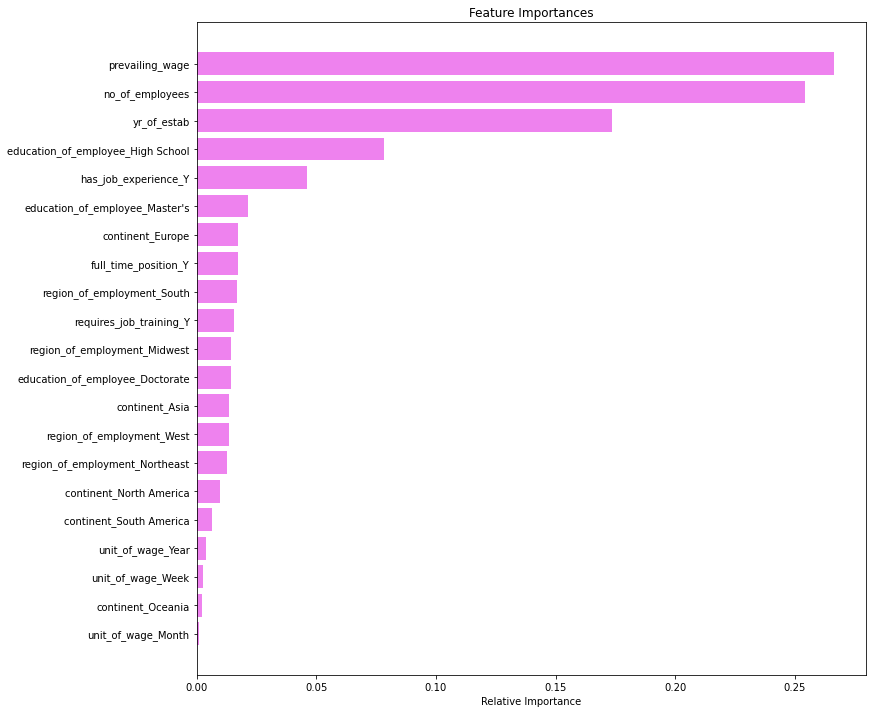

In [251]:
feature_names = X_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation :
* The scores do not look great. 
* FN and FP can be further improved.
* There is more scope of generalizing the scores.
* prevailing wage and no of employees are some of the important features according to the model.

### Hyperparameter Tuning - Decision Tree

In [71]:
import time

In [84]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator,parameters,scoring=scorer,n_jobs=-1)
start_time= time.time()
grid_obj = grid_obj.fit(X_train, y_train)
end_time = time.time()

dt_time = end_time-start_time
print("Time taken run the grid search:", dt_time)
# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

Time taken run the grid search: 2.3801491260528564


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

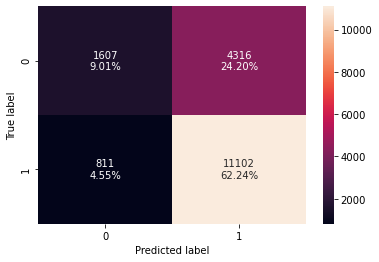

In [86]:
# lets check confusion matrix  for the dtree_estimator on the train data 

confusion_matrix_sklearn(dtree_estimator,X_train, y_train)

In [90]:
# # lets check for model performance 

dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


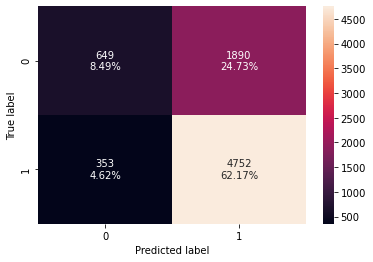

In [88]:
# lets not check the confusion matrix on the test data

confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

In [89]:
# Lets now check the model performance on test data 

dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


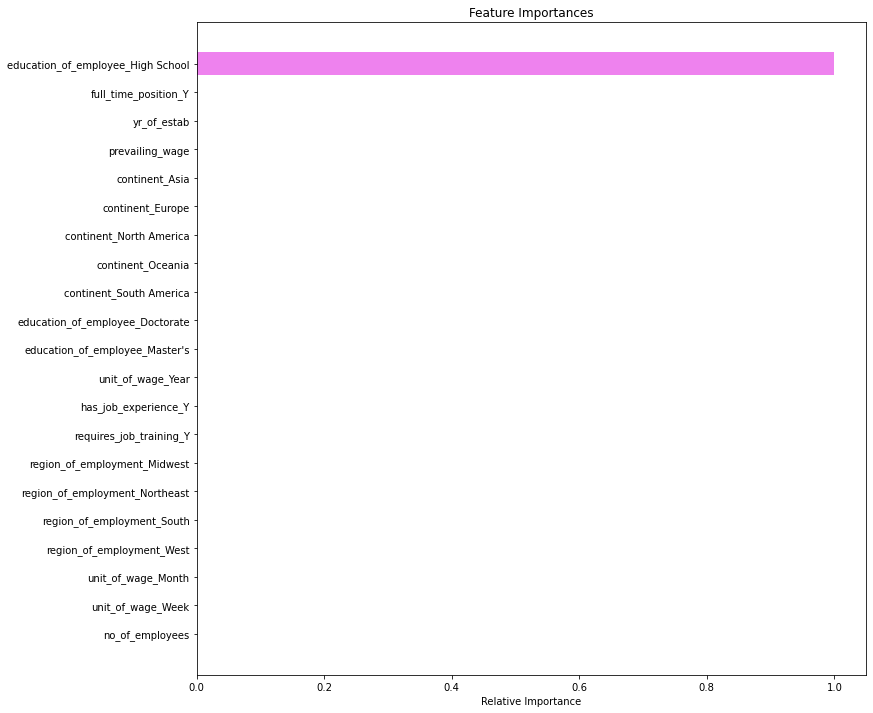

In [249]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation : 
* The scores are more generalized now.
* The scores on the test data is  very close to the train data.
* F1 score on the test data is 0.809058 and the on the train data is 0.812411
* It can be a good model.
* Education is an important feature according to the model.

## Building bagging and boosting models

### Bagging Classifier

In [95]:
# bagging classifier with random state = 1
bagging_classifier = BaggingClassifier(random_state = 1)
# lets fit a bagging model on train data 
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

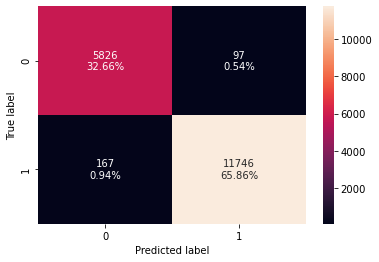

In [101]:
# lets check the confusion matrix of the Bagging classifier on the train data

confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

In [98]:
# lets the model perfomance scores
bagging_classifier_model_train_perf= model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


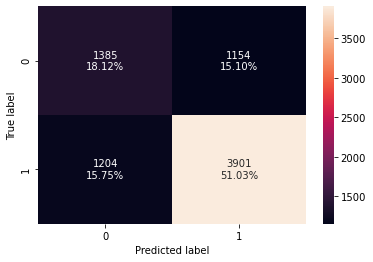

In [99]:
# lets check the confusion matrix of the Bagging classifier on the test data
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [207]:
# lets check the model performance scores on the test set 
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


### Observation
* The model seems to be overfitting on the train data.
* The model seemes to be performing well on the test data when compared to the train data
* However, we will further hypertune it for better scores

### Hyperparameter Tuning - Bagging Classifier

In [108]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [90, 120, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

## run grid search with cv=5
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5) 

## Fit the grid_obj on train data
bag_start_time= time.time()
grid_obj = grid_obj.fit(X_train, y_train) 
bag_end_time= time.time()
bag_total_time = bag_end_time-bag_start_time
print("Time taken run the grid search:", bag_total_time)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Time taken run the grid search: 458.09218549728394


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=120,
                  random_state=1)

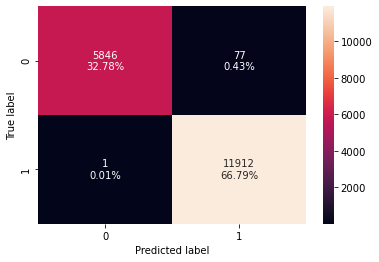

In [110]:
# lets check the confusion matrix for the tuned bagged model on the train data 
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

In [111]:
# lets check the model performance scores of the tuned bagged model on the train data 
bagging_estimator_tuned_model_train_perf= model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995627,0.999916,0.993577,0.996737


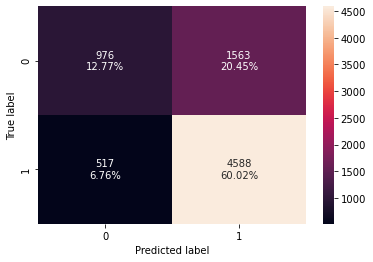

In [113]:
# lets check the confusion matrix for the tuned bagged model on the test data 
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

In [209]:
# lets check the model performance scores of the tuned bagged model on the train data 
bagging_estimator_tuned_model_test_perf= model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727891,0.898727,0.745895,0.81521


### Observation:
* The model is surely overfitting on the train data.
* The Test model perfoms well in the bagging tuned model than bagging classifier

### Random Forest

In [123]:
# defining random forest with random state = 1 and class_weight = balanced
rf_estimator= RandomForestClassifier(random_state=1, class_weight = "balanced")
#lets fit the model
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

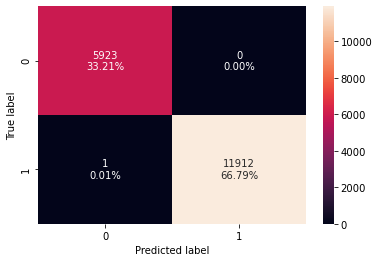

In [139]:
# checking the confusion matrix of rf_est model on the train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [140]:
# lets check the model performance of the rf_est model on the train data
rf_estimator_model_train_perf= model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


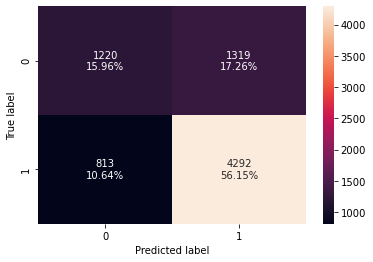

In [141]:
# checking the confusion matrix of rf_est model on the test data 
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [211]:
# checking the confusion matrix of rf_est model on the test data 
rf_estimator_model_test_perf= model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.721088,0.840744,0.764926,0.801045


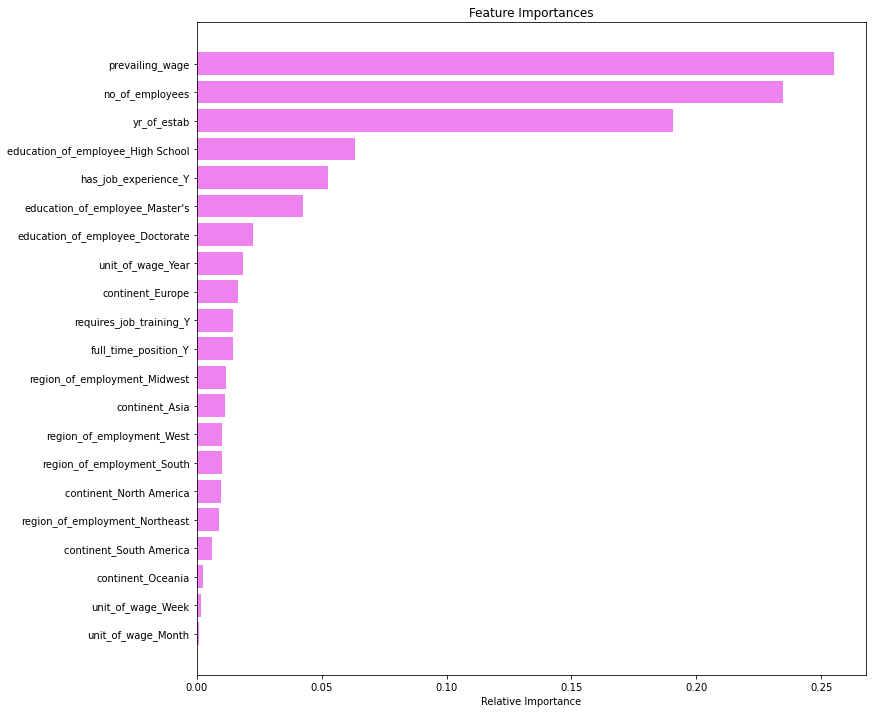

In [212]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation: 
* It is overfitting on the train data.
* Scores of the test data are not close to train data.
* previaling wage and no of employess are some important features according to this model.

### Hyperparameter Tuning - Random Forest

In [143]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": [0, 40, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_start_time= time.time()
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_end_time= time.time()

grid_total_time = grid_end_time-grid_start_time
print("Time taken to run the grid search:", grid_total_time)

## Complete the code to fit the grid_obj on the train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Time taken to run the grid search: 0.0


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=40, oob_score=True, random_state=1)

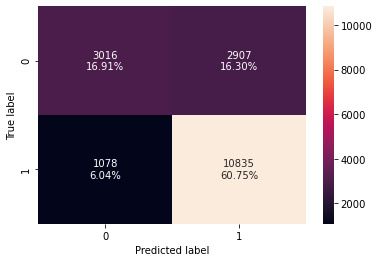

In [144]:
# checking the confusion matrix of tuned_rf_est model on the train data 
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [145]:
# lets check the model performance of the tuned_rf_est model on the train data
rf_tuned_model_train_perf= model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.776575,0.909511,0.788459,0.84467


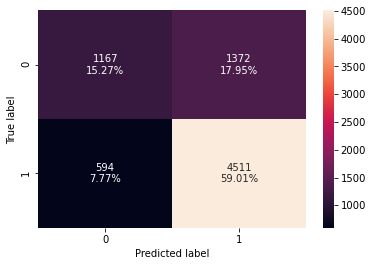

In [146]:
# checking the confusion matrix of tuned_rf_est model on the test data 
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [213]:
# checking the confusion matrix of tuned_rf_est model on the test data
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742805,0.883643,0.766786,0.821078


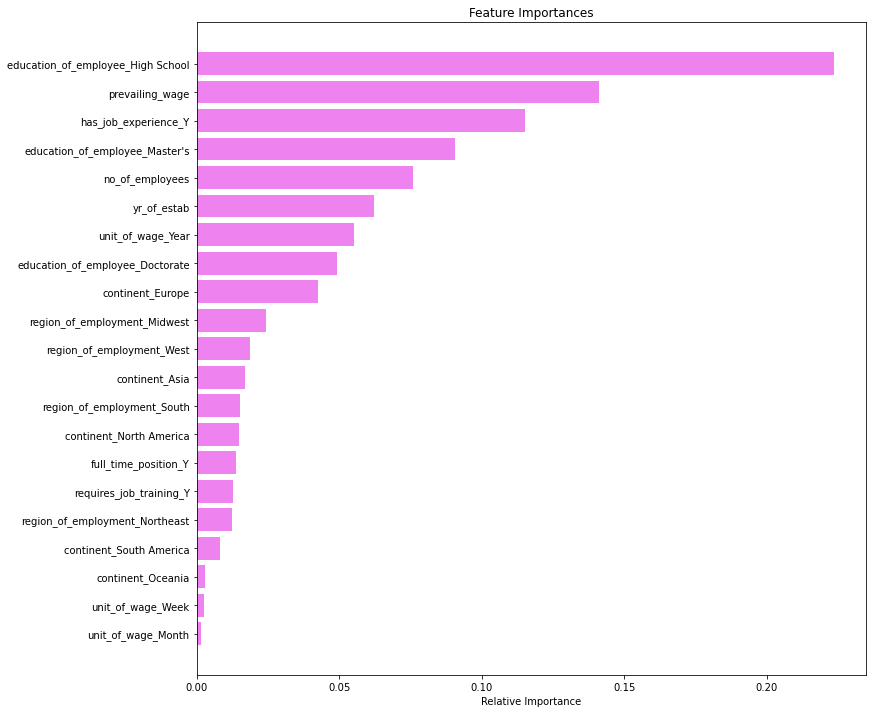

In [214]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation :
* The hyper tuned moded gives really good scores.
* F1 score on test data is very close to the train data.
* Over all a good model.
* Education and previaling wage are some important features according to this model.

### AdaBoost Classifier

In [148]:
##  defining AdaBoost Classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1) 
## Let's fit AdaBoost Classifier on the train data
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

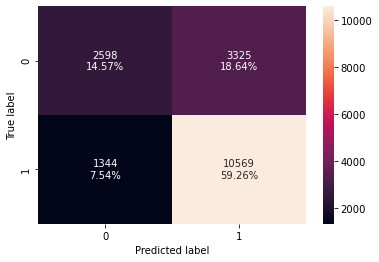

In [149]:
# checking the confusion matrix of adaboost model on the train data 
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [150]:
# lets check the model performance of the adaboost model on the train data 
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


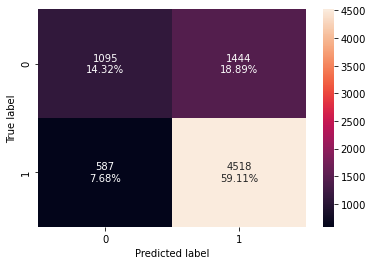

In [151]:
# checking the confusion matrix of adaboost model on the test data 
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [215]:
# lets check the model performance of the adaboost model on the test data 
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


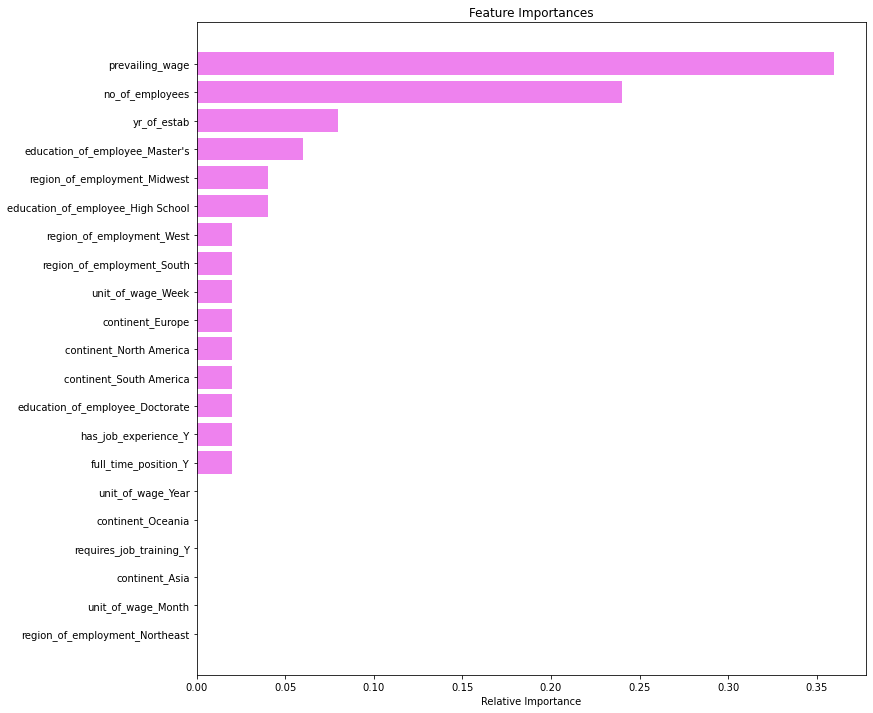

In [216]:
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation : 
* The model performs well on train and test data.
* The performance scores on both train and test are very close.
* Really good scores and a very good model.
*  previaling wage  and no of employees are some important features according to this model.

### Hypertuning - AdaBoost Classifier

In [153]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": [60, 100, 10],
    "learning_rate": [0.1, 0.4, 0.1],
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
## Complete the code to run grid search with cv = 5
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5) 

## Complete the code to fit the grid_obj on train data

ada_start_time = time.time()
grid_obj = grid_obj.fit(X_train, y_train)
ada_end_time = time.time()

ada_total_time = ada_end_time-ada_start_time
print("Time taken run the grid search:", ada_total_time)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Time taken run the grid search: 164.24202370643616


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

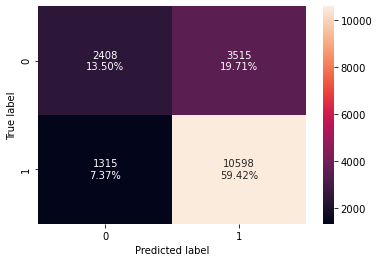

In [154]:
# checking the confusion matrix of tuned adaboost model on the train data 
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [155]:
# lets check the model performance of the tunedadaboost model on the train data 
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.729199,0.889616,0.750939,0.814416


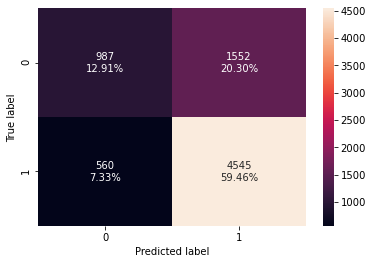

In [156]:
# checking the confusion matrix of tuned adaboost model on the test data 
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [217]:
# lets check the model performance of the tunedadaboost model on the test data 
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.723705,0.890304,0.745449,0.811462


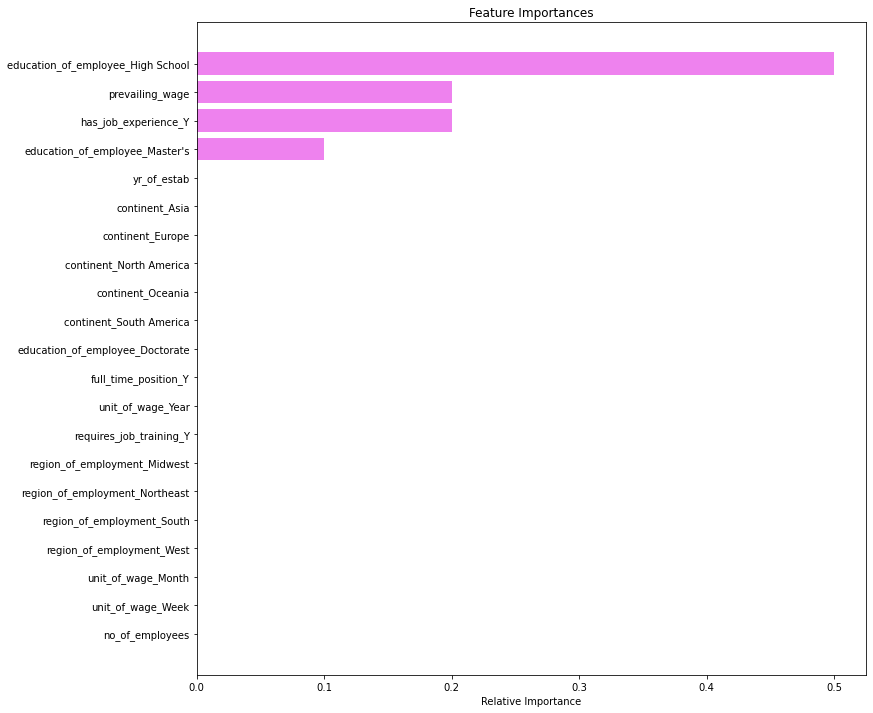

In [218]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation:
* Model performs well on both train and test data.
* model performance scores are genralized and very close when compared.
* F1 scores are almost the same
* Education and previaliing wage are some important features according to this model.

 ### Gradient Boosting Classifier

In [158]:
# defining Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)

## Let's fit Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

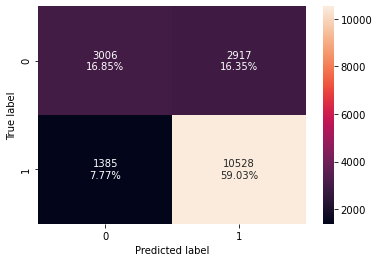

In [160]:
# checking the confusion matrix of GradientBoost model on the train data 
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [161]:
# lets check the model performance of the GradientBoost  model on the train data 
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


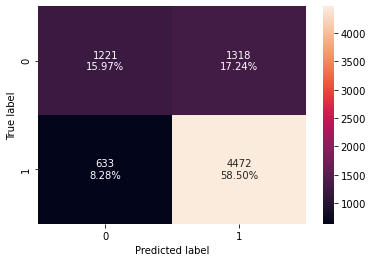

In [162]:
# checking the confusion matrix of GradientBoost model on the test data 
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [219]:
# lets check the model performance of the GradientBoost model model on the test data 
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


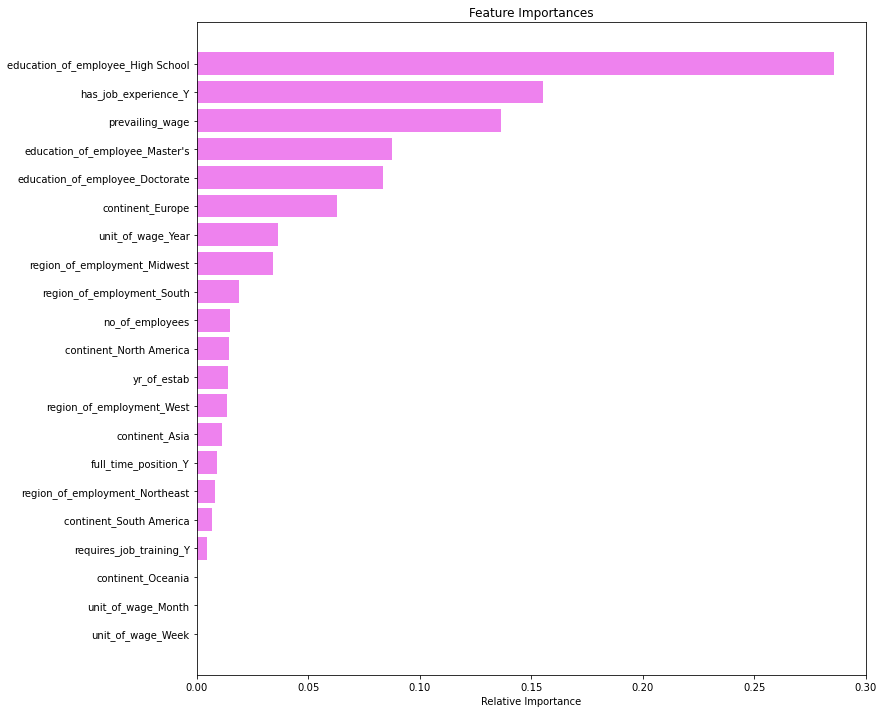

In [220]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation : 
* Model performs well on train and test data
* Scores on the both train and test are very close.
* Education and Job Experience are some important features according to this model.

### Hyperparameter Tuning Gradient Boosting Classifier

In [165]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150],
    "subsample": [0.8, 0.9],
    "max_features": [0.8, 0.9, 1],
    "learning_rate": [0.1, 0.4],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
## Complete the code to run grid search with cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5) 

## Let's fit the grid_obj on train data

grad_start_time = time.time()
grid_obj = grid_obj.fit(X_train, y_train)
grad_end_time = time.time()

grad_total_time = grad_end_time-grad_start_time
print("Time taken run the grid search:", grad_total_time)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Time taken run the grid search: 262.20593190193176


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

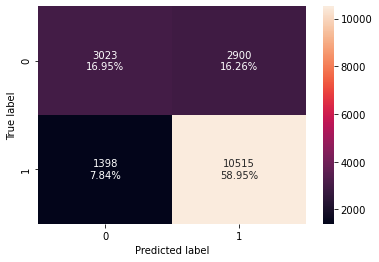

In [166]:
# checking the confusion matrix of Tuned GradientBoost model on the train data 
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [167]:
# lets check the model performance of the Tuned GradientBoost model on the train data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759027,0.882649,0.783824,0.830306


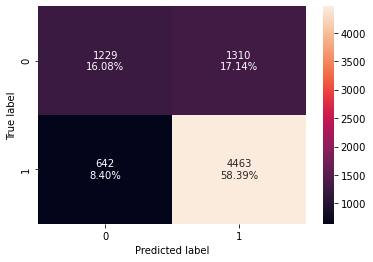

In [168]:
# checking the confusion matrix of Tuned GradientBoost model on the test data 
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [221]:
# lets check the model performance of the Tuned GradientBoost model on the test data 
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.874241,0.773082,0.820555


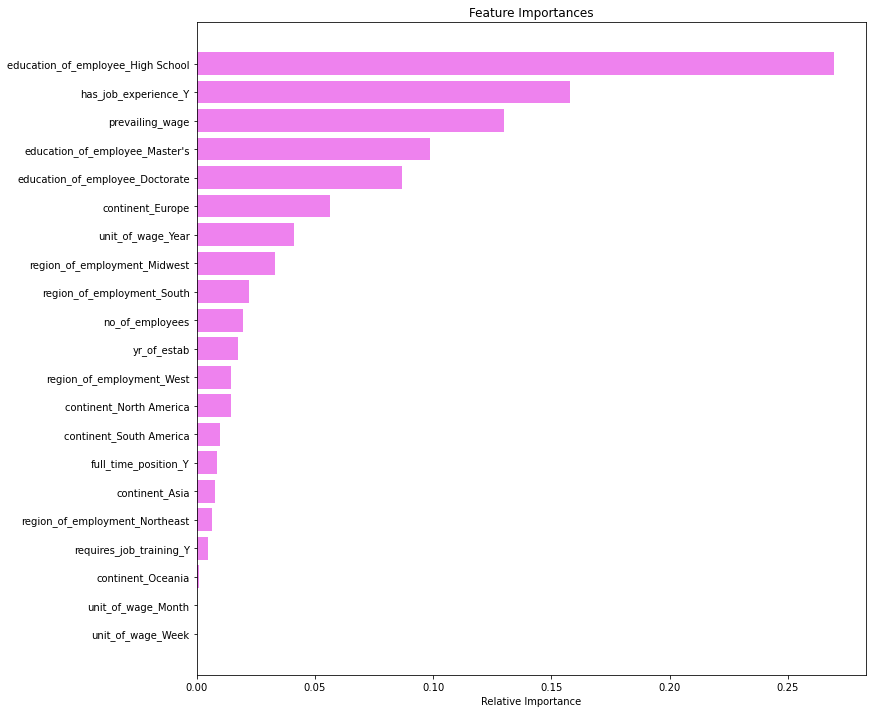

In [222]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation :
* Model performs well on train and test data.
* Scores on the both train and test are very close.
* Both the gradient and Tuned gradient model performance scores are identical.
* Education and Job Experience are some important features according to this model.

### XGBoost Classifier

In [170]:
#  defining XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state= 1,eval_metric="logloss") 
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

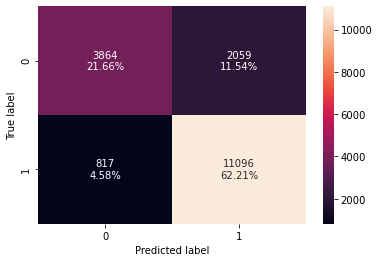

In [171]:
# checking the confusion matrix of XGBoost model on the train data 
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [172]:
# lets check the model performance of the  XGBoost model on the train data 
xgb_classifier_model_train_perf= model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


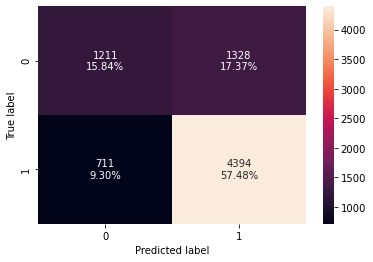

In [173]:
# checking the confusion matrix of XGBoost model on the test data 
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [223]:
# lets check the model performance of the  XGBoost model on the test data 
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


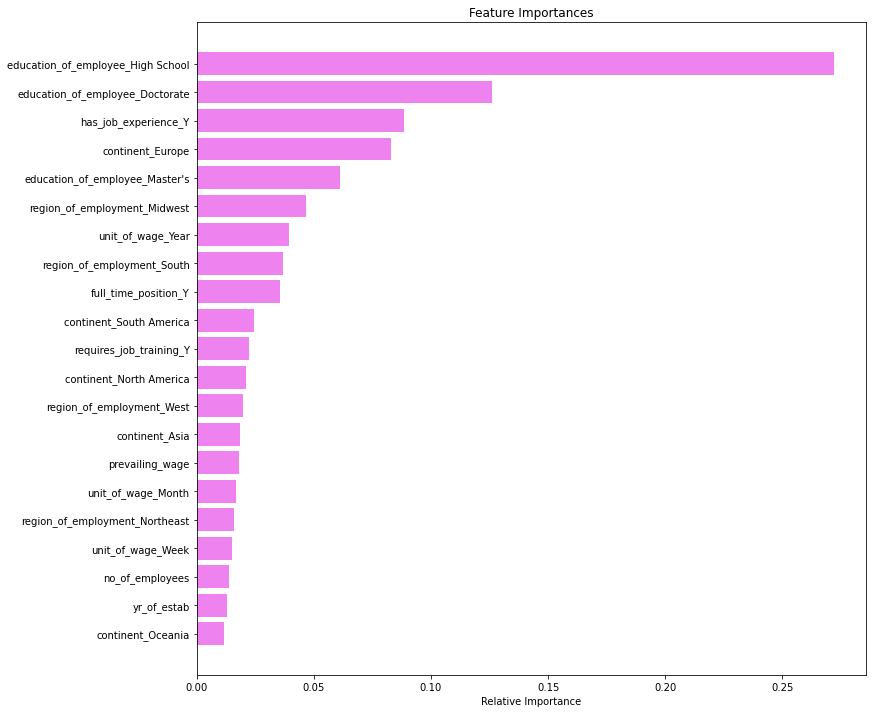

In [224]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation : 
* Model seems to be overfitting on the train data
* Scores do not look great when compared between train and test data.
* lets see if we can get generalized scored after tuning the model.
* Education and Job Experience are some important features according to this model.

### Hyperparameter Tuning - XGBoost Classifier

In [176]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV (xgb_tuned, parameters, scoring=scorer,cv=5)

# lets fit the model 

xgb_start_time = time.time()
grid_obj = grid_obj.fit(X_train,y_train)
xgb_end_time = time.time()

xgb_total_time = xgb_end_time-xgb_start_time

print("Time taken run the grid search:", xgb_total_time)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Time taken run the grid search: 1487.5704910755157


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

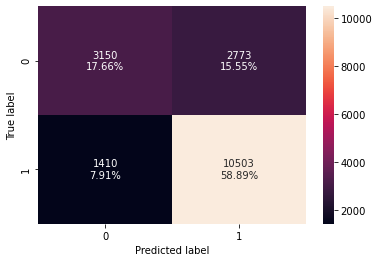

In [177]:
# checking the confusion matrix of Tuned XGBoost model on the train data 
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [178]:
# lets check the model performance of the Tuned XGBoost model on the train data 
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765474,0.881642,0.791127,0.833935


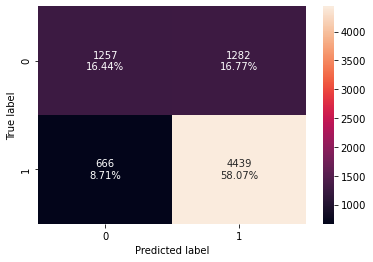

In [179]:
# checking the confusion matrix of Tuned XGBoost model on the test data 
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [225]:
# lets check the model performance of the Tuned XGBoost model on the test data 
xgb_tuned_model_test_perf= model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


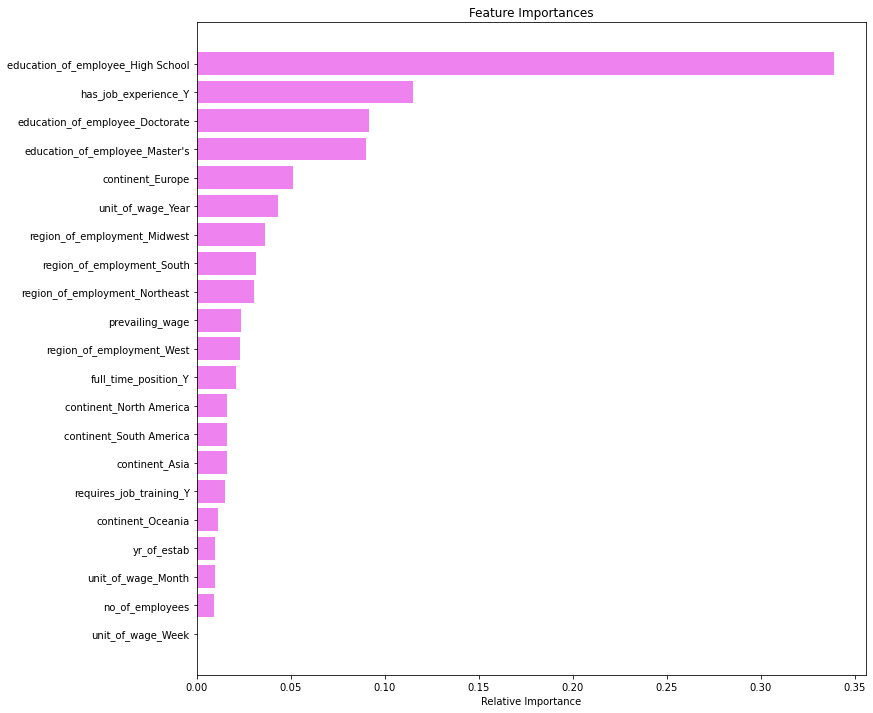

In [226]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation:
* The model performs really well.
* model performs really well on train data and there isnt any overfitting.
* The scores are generalized and very close when comapared.
* Good recall score ad F1 score.
* Over all are very good model.
* Education and Job Experience are some important features according to this model.

### Stacking Classifier

In [181]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

## Let's define Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

## Let's fit Stacking Classifier on the train data
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=3,
                                                       n_estimators=40,
                                                       oob_score=True,
                                                       random_state=...
                                                 gpu_

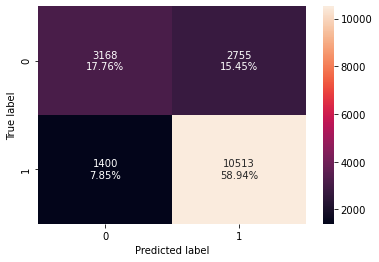

In [182]:
# checking the confusion matrix of Stacking model on the train data 
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [183]:
# lets check the model performance of the Stacking model on the train data 
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) 
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767044,0.882481,0.792358,0.834995


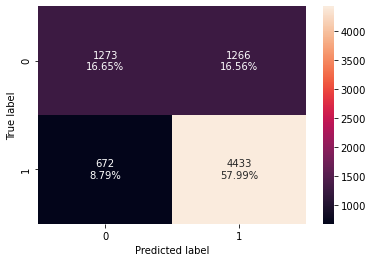

In [184]:
# checking the confusion matrix of Stacking model on the test data 
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [227]:
# lets check the model performance of the Stacking model on the test data 
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) 
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746468,0.868364,0.777856,0.820622


### Observation: 
*  Model performs well with generalized scored.
* Very identical to the Tuned XGboost model.
* Recall and F1 scores are similar to the XGboost model.

## Model Performance Comparison and Conclusions

In [188]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.995627,0.999944,0.776575,0.738226,0.729199,0.758802,0.759027,0.838753,0.765474,0.767044
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.909511,0.887182,0.889616,0.883740,0.882649,0.931419,0.881642,0.882481
Precision,1.0,0.720067,0.991810,0.993577,1.000000,0.788459,0.760688,0.750939,0.783042,0.783824,0.843482,0.791127,0.792358
F1,1.0,0.812411,0.988887,0.996737,0.999958,0.844670,0.819080,0.814416,0.830349,0.830306,0.885272,0.833935,0.834995


In [230]:
# checking the performance on the test data

# testing performance comparison
## Complete the code to check performance for test data
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Test Decision Tree",
    "Test Tuned Decision Tree",
    "Test Bagging Classifier",
    "Test Tuned Bagging Classifier",
    "Test Random Forest",
    "Test Tuned Random Forest",
    "Test Adaboost Classifier",
    "Test Tuned Adaboost Classifier",
    "Test Gradient Boost Classifier",
    "Test Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Test Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Test Decision Tree,Test Tuned Decision Tree,Test Bagging Classifier,Test Tuned Bagging Classifier,Test Random Forest,Test Tuned Random Forest,Test Adaboost Classifier,Test Tuned Adaboost Classifier,Test Gradient Boost Classifier,Test Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Test Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.727891,0.721088,0.742805,0.734301,0.723705,0.744767,0.744636,0.733255,0.745160,0.746468
Recall,0.742801,0.930852,0.764153,0.898727,0.840744,0.883643,0.885015,0.890304,0.876004,0.874241,0.860725,0.869540,0.868364
Precision,0.752232,0.715447,0.771711,0.745895,0.764926,0.766786,0.757799,0.745449,0.772366,0.773082,0.767913,0.775913,0.777856
F1,0.747487,0.809058,0.767913,0.815210,0.801045,0.821078,0.816481,0.811462,0.820927,0.820555,0.811675,0.820063,0.820622


### Obsevations  considering the F1 score metric.
* Decision tree,Tuned Decision tree, bagging , hyper tuned bagging, Random forest, were Overfitting on the Train data.
* Tuned Random Forest,Gradient test, Tuned Gradient test , XGBoosed tuned models performed really well in comparison to train and test data.
* However, in terms of F1 score of Gradient Boost Classifier with 0.820927 and Tuned Random Forest with 0.821078 shows the highest F1 score among all the mod els.
* An Overall best model perfromance scores with good F1 score  of 0.821078 is the Tuned Random Forest 

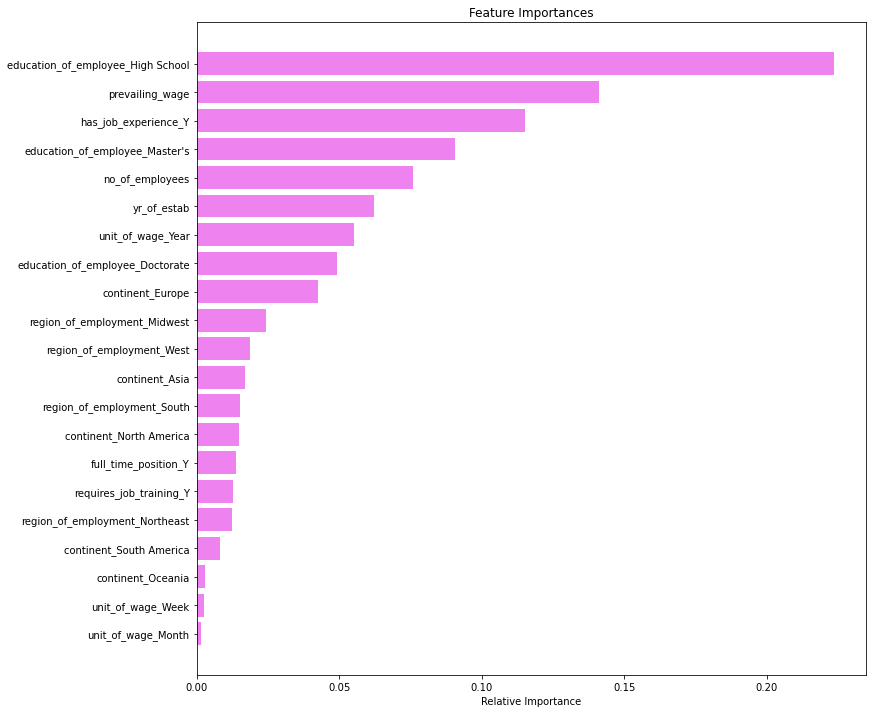

In [233]:
### Important Features of the final and the best model Tuned Random Forest
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation: 
* According our best model which is Tuned Random Forest with the F1 SCORE.  Above chart and the below listed are the few important factors that affect the visa certification process.
* Starting with Education which is the prime factor for visa certification process.
* Prevailing wage also has a good importance for the visa certification process.
* Job Experience is another important factor for the visa certification process.
* Followed by the rest of the factors such as masters education and no of employees etc..

## Actionable Insights and Recommendations

## Insights and conclusions
### Below Insights are based  on the  EDA and the best Random Forest Tuned Model.
#### These insights  can be  applicable to both the Employer and the Applicant. Hence, categorizing the insights into Certification and Denial Criterea.

### Certification criteria 
### According to the model and EDA, below are the few important factors to consider in order to Certify Visa.
* Education of the Employee - Applicants with Doctrate and Masters is highly preferred and the least Education level should be atleast a Bachelors degree.
* Prevailing wage -  The Peak or median of the prevailing wage for the certified cases is very high in comaprison to the denied cases.
* Job Experience - It was very clear that the applicants with Job Experience have higher chances of visa getting certified.
* Unit wage - Yearly unit wage has higher chances of certified cases followed by week unit wage.
* continent - Europe has the highest number of certified visas followed by Africa.
* Region of Employment - Midwest Region followed by south and northeast has higher cases certified.


### Denial Criteria
### According to the model and EDA, below are the few important factors to consider in order to  Deny Visa.
* Education of the Employee - Applicants with High school Education has the highest chances of visa being denied.
* Prevailing wage - The Peak or median of the prevailing wage for the denied cases is very low when comapred to the certified cases.
* Job Experience - It was very clear that the applicants with no  Job Experience have higher chances of visas getting Denied.
* Unit wage - Hourly unit wage has higher chances of visas getting Denied.
* continent - South America  has the highest percentage of visas getting denied.
* Region of Employment - Island has the least cases that are certified.

### Other factors : 
* Other factors such as Full time position and  Requires job training is not highly considered atleast as per the model when it comes to visa certification process



## Recommendations

### Recommendations: 

* It would have been appropriate to have more data such as Type of Job or specialization, Type of Education, Years of Experience , Age , Gender , Month and year the visa applied, location of the visa office.
* However, the data provided and the model gives a good idea as to what are basic requirements for the employer to look for before certifying a Visa.
* And, for the applicants to work on requirements needed to avoid their visa getting denied.